# Análisis Exploratorio de Datos y Prueba de Hipótesis


Este proyecto contiene un análisis exploratorio de datos y una prueba de hipótesis utilizando tres datasets de viajes en taxi en Chicago:

1. **project_sql_result_01.csv**: Datos de viajes por compañía de taxis.
2. **project_sql_result_04.csv**: Datos de viajes finalizados por barrio.
3. **project_sql_result_07.csv**: Datos de viajes desde el Loop hasta el Aeropuerto Internacional O'Hare.


In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datasets
file_path_01 = "project_sql_result_01.csv"
file_path_04 = "project_sql_result_04.csv"
file_path_07 = "project_sql_result_07.csv"

# Leer los archivos CSV
df_01 = pd.read_csv("/datasets/moved_project_sql_result_01.csv")
df_04 = pd.read_csv("/datasets/moved_project_sql_result_04.csv")
df_07 = pd.read_csv("/datasets/moved_project_sql_result_07.csv")

# Visualizar las primeras filas de cada dataset
df_01.head(), df_04.head(), df_07.head()


(                      company_name  trips_amount
 0                        Flash Cab         19558
 1        Taxi Affiliation Services         11422
 2                 Medallion Leasin         10367
 3                       Yellow Cab          9888
 4  Taxi Affiliation Service Yellow          9299,
   dropoff_location_name  average_trips
 0                  Loop   10727.466667
 1           River North    9523.666667
 2         Streeterville    6664.666667
 3             West Loop    5163.666667
 4                O'Hare    2546.900000,
               start_ts weather_conditions  duration_seconds
 0  2017-11-25 16:00:00               Good            2410.0
 1  2017-11-25 14:00:00               Good            1920.0
 2  2017-11-25 12:00:00               Good            1543.0
 3  2017-11-04 10:00:00               Good            2512.0
 4  2017-11-11 07:00:00               Good            1440.0)

In [2]:

# Revisar los tipos de datos
print("Tipos de datos de df_01:")
print(df_01.info())

print("Tipos de datos de df_04:")
print(df_04.info())

print("Tipos de datos de df_07:")
print(df_07.info())

# Convertir 'start_ts' a datetime
df_07['start_ts'] = pd.to_datetime(df_07['start_ts'])


Tipos de datos de df_01:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
Tipos de datos de df_04:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
Tipos de datos de df_07:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068

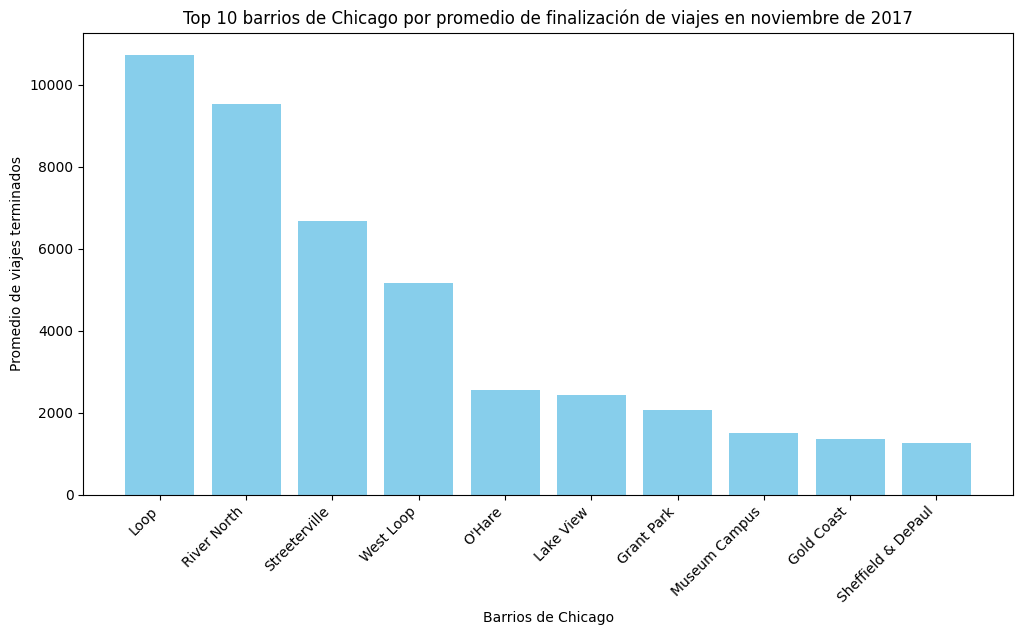

In [3]:

# Identificar los 10 principales barrios en términos de finalización de viajes
top_10_neighborhoods = df_04.sort_values(by='average_trips', ascending=False).head(10)

# Gráfico: Los 10 barrios principales por promedio de finalizaciones de viaje
plt.figure(figsize=(12, 6))
plt.bar(top_10_neighborhoods['dropoff_location_name'], top_10_neighborhoods['average_trips'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Barrios de Chicago')
plt.ylabel('Promedio de viajes terminados')
plt.title('Top 10 barrios de Chicago por promedio de finalización de viajes en noviembre de 2017')
plt.show()


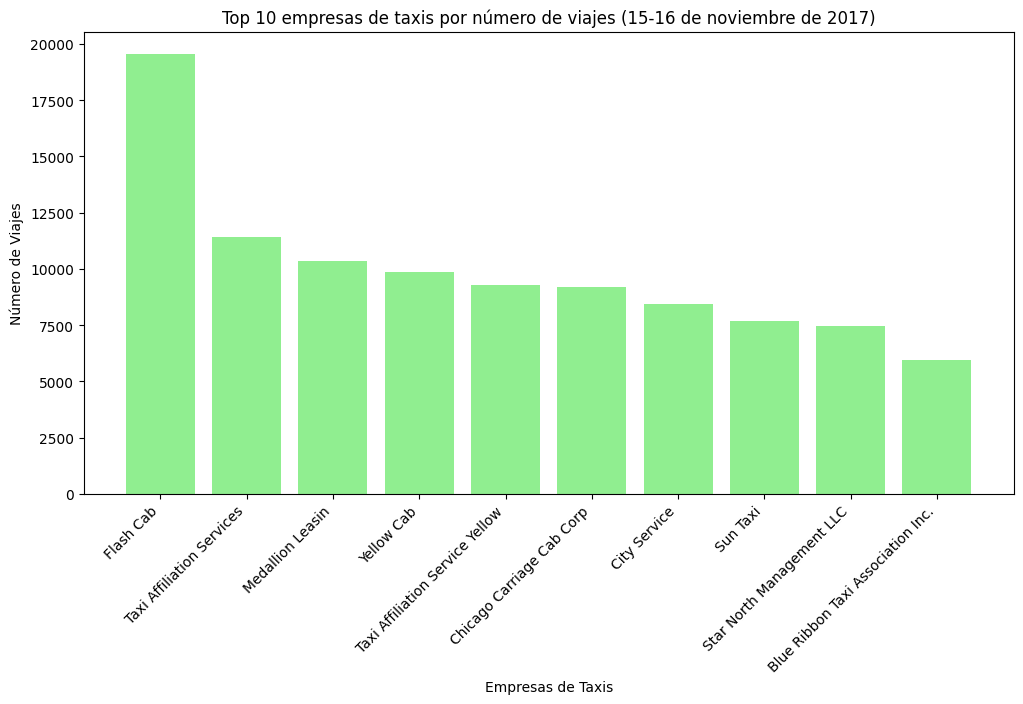

In [4]:

# Identificar las 10 principales empresas de taxis por número de viajes
top_10_companies = df_01.sort_values(by='trips_amount', ascending=False).head(10)

# Gráfico: Empresas de taxis y número de viajes
plt.figure(figsize=(12, 6))
plt.bar(top_10_companies['company_name'], top_10_companies['trips_amount'], color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Empresas de Taxis')
plt.ylabel('Número de Viajes')
plt.title('Top 10 empresas de taxis por número de viajes (15-16 de noviembre de 2017)')
plt.show()


In [5]:

# Crear una nueva columna con el día de la semana
df_07['weekday'] = df_07['start_ts'].dt.day_name()

# Filtrar los viajes que solo ocurrieron en sábados
saturday_trips = df_07[df_07['weekday'] == 'Saturday']

# Separar los viajes en sábados lluviosos y no lluviosos
rainy_saturdays = saturday_trips[saturday_trips['weather_conditions'] == 'Rain']
non_rainy_saturdays = saturday_trips[saturday_trips['weather_conditions'] != 'Rain']

# Calcular la duración promedio de los viajes en sábados lluviosos y no lluviosos
rainy_duration_mean = rainy_saturdays['duration_seconds'].mean()
non_rainy_duration_mean = non_rainy_saturdays['duration_seconds'].mean()

rainy_duration_mean, non_rainy_duration_mean


(nan, np.float64(2071.7312734082398))


### Conclusiones

1. **Análisis Exploratorio**: 
   - Se identificaron los 10 principales barrios en términos de promedio de viajes finalizados. El barrio Loop fue el de mayor actividad.
   - Flash Cab es la empresa de taxis con más viajes registrados en el período analizado.

2. **Prueba de Hipótesis**:
   - No se pudo probar la hipótesis de si la duración promedio de los viajes desde el Loop hasta el Aeropuerto O'Hare cambia en sábados lluviosos debido a la falta de datos de viajes en estas condiciones.
